In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.metrics import confusion_matrix
from tensorflow import keras

from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential, clone_model
from keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
)
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

In [38]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert class vectors to binary class matrices thru One-hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

print(x_train.dtype)
print(x_train.ndim)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
float32
4


In [40]:
from keras.backend import clear_session

clear_session()

In [20]:
# DEFINE the OWN CNN Model

input_shape = (32, 32, 3)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        # layers.Conv2D(64, kernel_size=(3, 3), activation="relu",),
        # layers.Conv2D(64, kernel_size=(3, 3), activation="relu",),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),  # BatchNorm after Conv layer """
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(
            128, kernel_size=(3, 3), activation="relu", padding="same"
        ),  # Added Extra layer
        layers.Conv2D(
            128, kernel_size=(3, 3), activation="relu", padding="same"
        ),  # Added Extra layer
        layers.BatchNormalization(),  # BatchNorm after Conv layer
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(
            256, kernel_size=(3, 3), activation="relu", padding="same"
        ),  # Added Extra layer
        layers.Conv2D(
            256, kernel_size=(3, 3), activation="relu", padding="same"
        ),  # Added Extra layer
        layers.BatchNormalization(),  # BatchNorm after Conv layer """
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),  # BatchNorm after Conv layer
        layers.Dense(10, activation="softmax"),
    ]
)

In [21]:
# COMPILE the Model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       1

In [22]:
# DATA AUGMENTATION TO INCREASE THE TRAINING DATA BY APPLYING RANDOM TRANSFORMATION (like rotation, zooming)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # Rotate images up to 15 degrees
    width_shift_range=0.1,  # Horizontally shift images by 10%
    height_shift_range=0.1,  # Vertically shift images by 10%
    horizontal_flip=True,  # Randomly flip images
)

# Fit the data generator on the training data
datagen.fit(x_train)

In [ ]:
# Using the data generator when training the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=100,
    validation_data=(x_test, y_test),
)

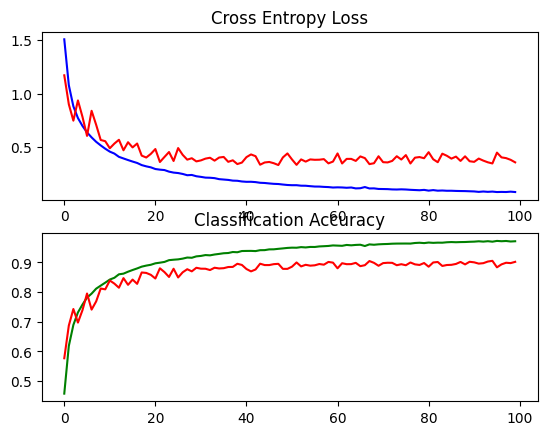

313/313 [==============================] - 1s 4ms/step - loss: 0.3579 - accuracy: 0.9022
Model Loss: 0.35794973373413086
Model Accuracy: 0.9021999835968018
313/313 [==============================] - 1s 3ms/step


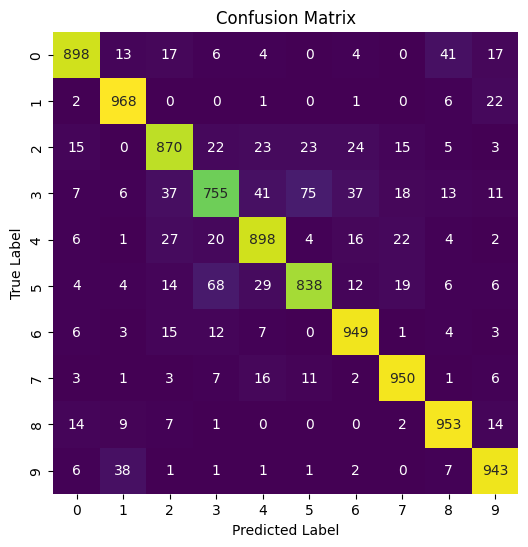

In [16]:
def evaluate_model(model, history):

    # plot loss
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history["loss"], color="blue", label="train")
    plt.plot(history.history["val_loss"], color="red", label="val")

    # plot accuracy
    plt.subplot(212)
    plt.title("Classification Accuracy")
    plt.plot(history.history["accuracy"], color="green", label="train")
    plt.plot(history.history["val_accuracy"], color="red", label="val")
    plt.show()

    # evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Model Loss:", test_loss)
    print("Model Accuracy:", test_acc)

    # make predictions
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    conf_mat = confusion_matrix(y_test_labels, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="viridis", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


evaluate_model(model, history)

In [ ]:
""" # DISPLAY IMAGES TO SEE WHAT THE MODEL IS SEEING/PREDICTING

import numpy as np
import matplotlib.pyplot as plt

# y_test is the true labels and y_pred is the predicted labels
# Also assuing x_test contains the original images

# Get the index of images to display
num_images = 10  # Number of images to display
indices = np.random.choice(np.arange(len(y_test)), size=num_images, replace=False)

# Prepare the figure
plt.figure(figsize=(15, 5))

for i, idx in enumerate(indices):
    plt.subplot(2, num_images // 2, i + 1)  # Create a subplot grid
    plt.imshow(x_test[idx])  # Display the image
    plt.axis('off')  # Turn off axis
    
    # Display true and predicted labels
    true_label = np.argmax(y_test[idx])  # Get the true label
    predicted_label = np.argmax(y_pred[idx])  # Get the predicted label
    plt.title(f'True: {true_label}\nPred: {predicted_label}', fontsize=10)

plt.tight_layout()
plt.show() """

# USING VGG16 to Evaluate the Accuracy 
 Step1: Exclude the final classification layer and keep the other layers
 Step2: Freeze all the VGG16 Layers
 Step3: Create new layer/model on top of VGG16 model
 Step4: Compile the model
 Step5: Train the model using CIFAR10 DS from above
 Step6: Evaluate the Model

In [41]:
# TRANSFER LEARNING USING VGG16 to Evaluate the Accuracy

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load VGG16 model pre-trained on ImageNet
vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model on top of VGG16
model_vgg = models.Sequential(
    [
        vgg_model,
        layers.Flatten(),
        layers.Dense(1024, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)


# Compile the model
model_vgg.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-5),  # Adjust learning rate
    metrics=["accuracy"],
)

model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                        

In [42]:
# UPSIZE the image from 32*32*1 to 224*224*1 WITHOUT DATA AUGMENTATION

import tensorflow as tf


# Define a function to resize images on the fly
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to 224x224
    return image, label


# Convert the dataset to TensorFlow Dataset API and apply preprocessing
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess_image).batch(128).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess_image).batch(128).prefetch(tf.data.AUTOTUNE)

# Model training -  # INCLUDED IN THE NEXT CELL!!!
# history = model_vgg.fit(train_ds, epochs=50, validation_data=test_ds)

In [33]:
""" # UPSIZING WITH DATA AUGMENTATION

import tensorflow as tf

# Define a function to resize images on the fly that includes Data augmentation function
def preprocess_image(image, label, augment=False):
    # Resize to 224x224
    image = tf.image.resize(image, (224, 224))  

    # Include Data augmentation steps below. After resizing and before picking the next batch
    if augment:
        # Apply random flipping
        image = tf.image.random_flip_left_right(image)
        # Apply random contrast adjustment
        image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
        # Apply random rotation (e.g., 20 degrees)
        image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
                               
    return image, label


# Convert the training dataset to TensorFlow Dataset API and apply augmentation + preprocessing
# Resizing done in batches of 128 instead of whole DS, leading to memory crash, Prefetch loads the next set while the current batch is in progress.
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(lambda x, y: preprocess_image(x, y, augment=True)).batch(128).prefetch(tf.data.AUTOTUNE)

# Convert the test dataset and apply only preprocessing (no augmentation)
# Resizing done in batches of 128 instead of whole DS, leading to memory crash, Prefetch loads the next set while the current batch is in progress.
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(lambda x, y: preprocess_image(x, y, augment=False)).batch(128).prefetch(tf.data.AUTOTUNE)

# Model training -  # INCLUDED IN THE NEXT CELL!!!
#history = model_vgg.fit(train_ds, epochs=3, validation_data=test_ds) """

In [43]:
# Define the EarlyStopping callback if there is no improvement of Training
early_stopping = EarlyStopping(
    monitor="val_loss",  # Watch validation loss
    patience=8,  # Stop if no improvement for 8 epochs
    restore_best_weights=True,  # Restore the best weights
)

In [44]:
# Add ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint(
    "best_model_vgg16.keras",  # File to save the model
    monitor="val_accuracy",  # Save based on validation accuracy
    save_best_only=True,  # Only save the model if it improves
    mode="max",  # We want to maximize accuracy
    verbose=1,
)

# Train the model
history = model_vgg.fit(
    train_ds,
    epochs=50,
    validation_data=test_ds,
    callbacks=[
        checkpoint,
        early_stopping,
    ],  # Adding Checkpoint and EarlyStopping in the same Callbacks.
)

# Save the entire model at the end
model_vgg.save(
    r"C:\Users\KK\Documents\$$$IRONHACK\3-Deep Learning\Day13\vgg16_cifar10_final.keras"
)

Epoch 1/50
391/391 [==============================] - ETA: 0s - loss: 2.6553 - accuracy: 0.2575
Epoch 1: val_accuracy improved from -inf to 0.47770, saving model to best_model_vgg16.keras
391/391 [==============================] - 66s 165ms/step - loss: 2.6553 - accuracy: 0.2575 - val_loss: 1.4618 - val_accuracy: 0.4777
Epoch 2/50
391/391 [==============================] - ETA: 0s - loss: 2.0024 - accuracy: 0.4000
Epoch 2: val_accuracy improved from 0.47770 to 0.59840, saving model to best_model_vgg16.keras
391/391 [==============================] - 65s 167ms/step - loss: 2.0024 - accuracy: 0.4000 - val_loss: 1.1769 - val_accuracy: 0.5984
Epoch 3/50
391/391 [==============================] - ETA: 0s - loss: 1.7723 - accuracy: 0.4612
Epoch 3: val_accuracy improved from 0.59840 to 0.62370, saving model to best_model_vgg16.keras
391/391 [==============================] - 66s 168ms/step - loss: 1.7723 - accuracy: 0.4612 - val_loss: 1.1007 - val_accuracy: 0.6237
Epoch 4/50
391/391 [========

In [45]:
""" # Loading the saved model later for evaluation or fine-tuning
from tensorflow.keras.models import load_model
model_vgg_loaded = load_model('vgg16_cifar10_final.keras')

# Evaluate the SAVED model
score = model_vgg_loaded.evaluate(test_ds)
print(f'Test Loss: {score[0]}, Test Accuracy: {score[1]}') """

" # Loading the saved model later for evaluation or fine-tuning\nfrom tensorflow.keras.models import load_model\nmodel_vgg_loaded = load_model('vgg16_cifar10_final.keras')\n\n# Evaluate the SAVED model\nscore = model_vgg_loaded.evaluate(test_ds)\nprint(f'Test Loss: {score[0]}, Test Accuracy: {score[1]}') "

In [46]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_vgg.evaluate(test_ds)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

79/79 [==============================] - 10s 133ms/step - loss: 0.6924 - accuracy: 0.7777
Test Loss: 0.6924353837966919
Test Accuracy: 0.7777000069618225


79/79 [==============================] - 10s 132ms/step


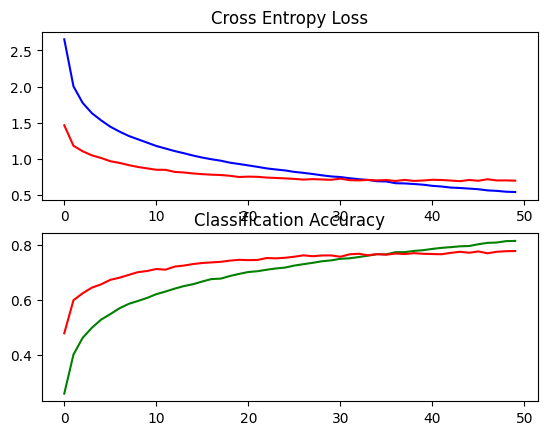

79/79 [==============================] - 11s 133ms/step - loss: 0.6924 - accuracy: 0.7777
Test Loss: 0.6924353837966919
Test Accuracy: 0.7777000069618225


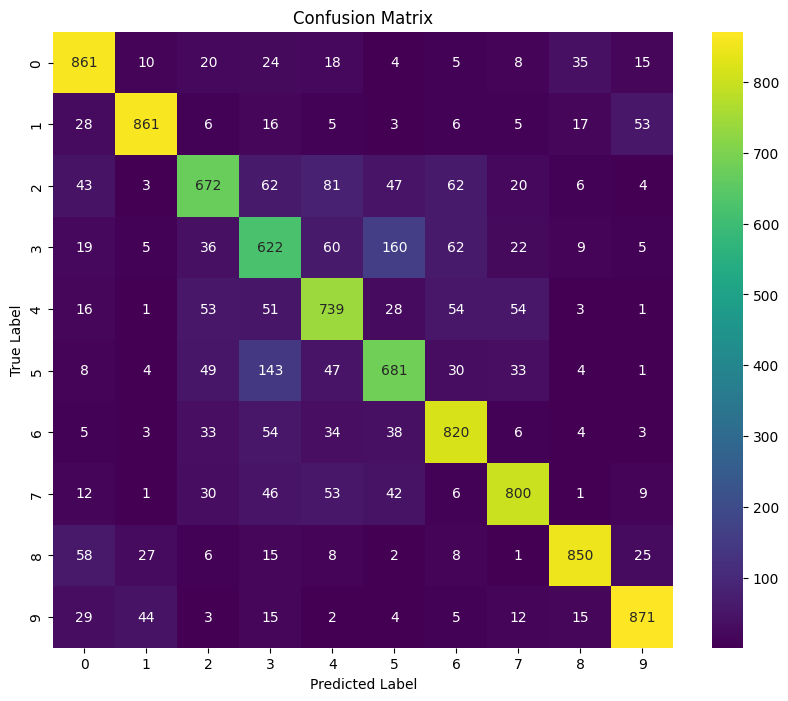

In [47]:
# Get the true labels and Make predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = model_vgg.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true_classes = np.argmax(y_true, axis=1)

# plot loss
plt.subplot(211)
plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="red", label="val")

# plot accuracy
plt.subplot(212)
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color="green", label="train")
plt.plot(history.history["val_accuracy"], color="red", label="val")
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_vgg.evaluate(test_ds)
# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="viridis",
    xticklabels=range(10),
    yticklabels=range(10),
)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# TRANSFER LEARNING with VGG16
# Unfreeze the top few layers for fine-tuning
for layer in vgg_model.layers[-4:]:  # Fine-tune the last 4 layers
    layer.trainable = True

# Compile the model again with a lower learning rate
from tensorflow.keras.optimizers import Adam

model_vgg.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=.00001),  # Lower learning rate for fine-tuning
                  metrics=['accuracy'])

# Continue training (fine-tuning the top layers)
history_fine_tune = model_vgg.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

# Evaluate the fine-tuned model
score_fine_tune = model_vgg.evaluate(x_test, y_test)
print(f'Fine-tuned VGG16 Test Loss: {score_fine_tune[0]}, Test Accuracy: {score_fine_tune[1]}')



In [48]:
# FINE-TUNING of the VGG-16 Model Integration


# Unfreeze the top layers for fine-tuning
for layer in vgg_model.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True

In [49]:
# COMPILE the Model

from tensorflow.keras.optimizers import Adam

# Compile with a lower learning rate
model_vgg.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate
    metrics=["accuracy"],
)

In [50]:
# FIT the Model

history_fine_tune = model_vgg.fit(
    train_ds,  # Your training dataset
    validation_data=test_ds,  # Your test dataset
    epochs=30,  # Fine-tune for a few epochs, starting with 10 and then will try 20
    batch_size=128,  # Adjust batch size as needed, starting with 128 will adjust to 64
)

Epoch 1/30
391/391 [==============================] - 60s 148ms/step - loss: 0.5205 - accuracy: 0.8202 - val_loss: 0.6638 - val_accuracy: 0.7869
Epoch 2/30
391/391 [==============================] - 58s 147ms/step - loss: 0.4688 - accuracy: 0.8376 - val_loss: 0.6652 - val_accuracy: 0.7907
Epoch 3/30
391/391 [==============================] - 58s 147ms/step - loss: 0.4296 - accuracy: 0.8514 - val_loss: 0.6511 - val_accuracy: 0.7916
Epoch 4/30
391/391 [==============================] - 58s 148ms/step - loss: 0.3934 - accuracy: 0.8636 - val_loss: 0.6399 - val_accuracy: 0.7974
Epoch 5/30
391/391 [==============================] - 58s 147ms/step - loss: 0.3599 - accuracy: 0.8754 - val_loss: 0.6398 - val_accuracy: 0.7976
Epoch 6/30
391/391 [==============================] - 58s 147ms/step - loss: 0.3338 - accuracy: 0.8848 - val_loss: 0.6445 - val_accuracy: 0.7978
Epoch 7/30
391/391 [==============================] - 58s 148ms/step - loss: 0.3050 - accuracy: 0.8950 - val_loss: 0.6421 - val_ac

In [51]:
# EVALUATE the Fine-tuned Model

score_fine_tune = model_vgg.evaluate(test_ds)
print(
    f"Fine-tuned VGG16 Test Loss: {score_fine_tune[0]}, Test Accuracy: {score_fine_tune[1]}"
)

79/79 [==============================] - 11s 133ms/step - loss: 0.8222 - accuracy: 0.8073
Fine-tuned VGG16 Test Loss: 0.8222408890724182, Test Accuracy: 0.8072999715805054


79/79 [==============================] - 10s 131ms/step


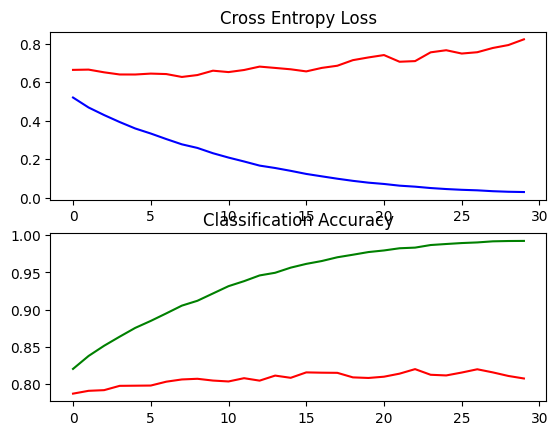

79/79 [==============================] - 10s 132ms/step - loss: 0.8222 - accuracy: 0.8073
Test Loss: 0.8222408890724182
Test Accuracy: 0.8072999715805054


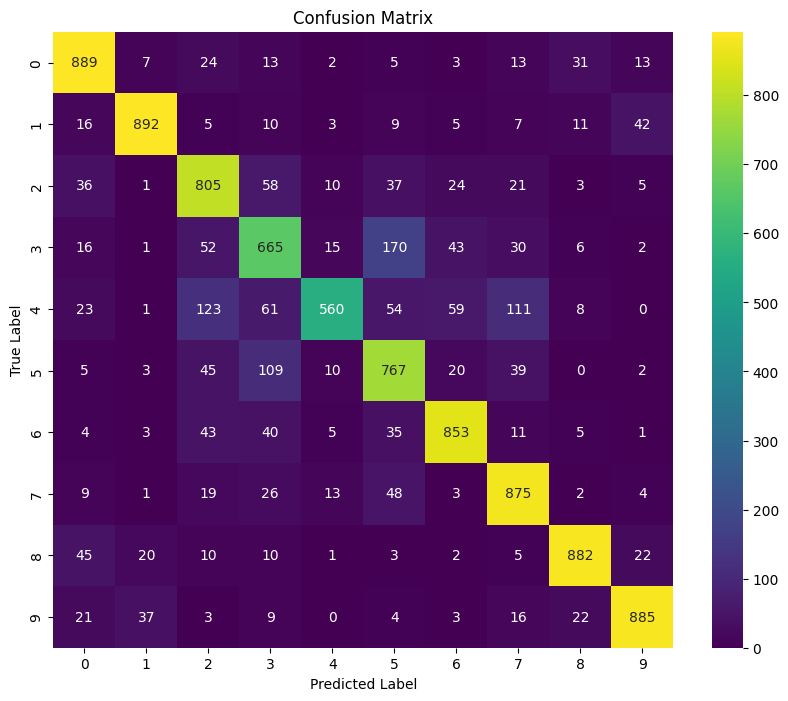

In [52]:
# Get the true labels and Make predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = model_vgg.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true_classes = np.argmax(y_true, axis=1)

# plot loss
plt.subplot(211)
plt.title("Cross Entropy Loss")
plt.plot(history_fine_tune.history["loss"], color="blue", label="train")
plt.plot(history_fine_tune.history["val_loss"], color="red", label="val")

# plot accuracy
plt.subplot(212)
plt.title("Classification Accuracy")
plt.plot(history_fine_tune.history["accuracy"], color="green", label="train")
plt.plot(history_fine_tune.history["val_accuracy"], color="red", label="val")
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_vgg.evaluate(test_ds)
# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="viridis",
    xticklabels=range(10),
    yticklabels=range(10),
)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()